<a href="https://colab.research.google.com/github/HamedTabkhi/Intro-to-ML/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 500, centers = 2, n_features = 2, random_state=7)

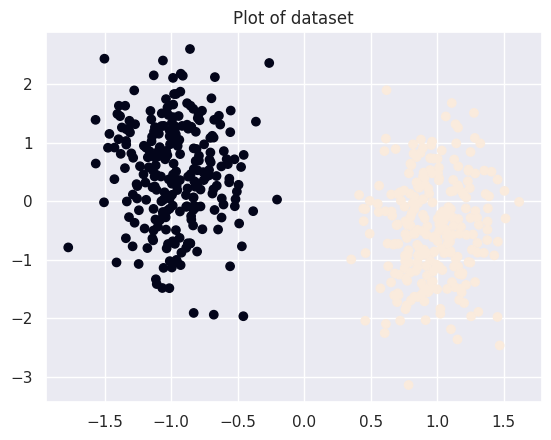

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
plt.title("Plot of dataset")
plt.scatter(X[:, 0], X[:, 1], c=y)

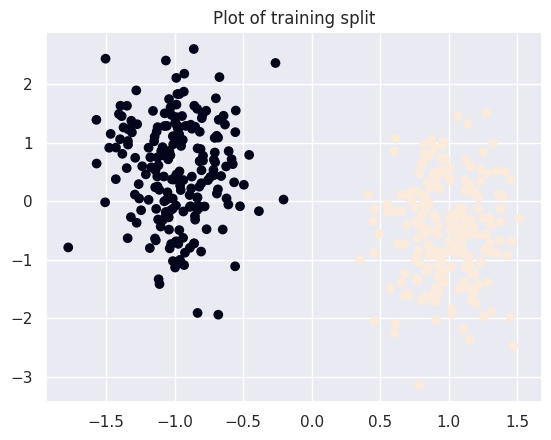

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=290)
plt.title("Plot of training split")
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

In [4]:
#Creating a classifier
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
classifier = Perceptron(max_iter=100, eta0=0.1, random_state=0)
#eta0: Constant by which the updates are multiplied.#eta0double, default=1

classifier.fit(X_train, y_train) #Training the model using classifier
#Getting cross validation score to predict the model accuracy
scores = cross_val_score(classifier, X_train, y_train, cv=5)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.9975 (+/- 0.0100)


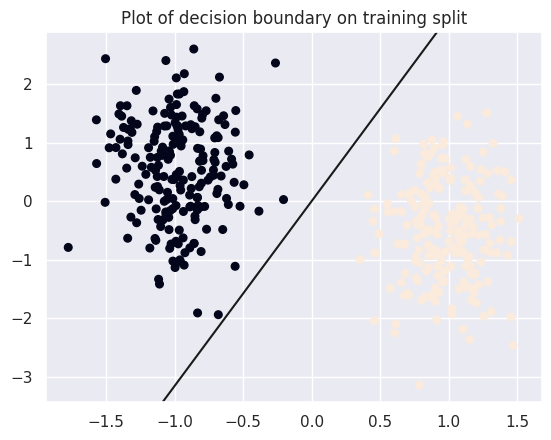

In [5]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30)
ax = plt.gca()
plt.title("Plot of decision boundary on training split")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=1,
linestyles=['-'])

In [6]:
from sklearn import metrics
y_pred = classifier.predict(X_test)
print("Accuracy: %0.4f"% metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9900


In [7]:
#Creating an SVM classifier
from sklearn import svm
classifier = svm.SVC(kernel="linear")
#Training the model using classifier
classifier.fit(X_train, y_train)
#Getting cross validation score to predict the model accuracy
scores = cross_val_score(classifier, X_train, y_train, cv=5)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 1.0000 (+/- 0.0000)


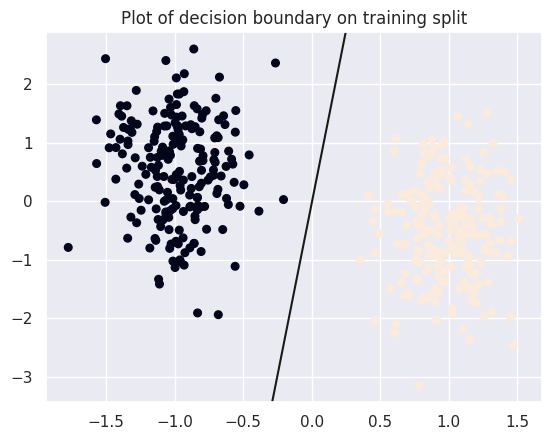

In [8]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30)
ax = plt.gca()
plt.title("Plot of decision boundary on training split")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=1,
linestyles=['-'])

In [9]:
y_pred = classifier.predict(X_test)
print("Accuracy: %0.4f" % metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0000
